Importações

In [81]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

Funções

In [ ]:
def simulate_infection(graph: nx.graph, beta: float, mi: float, initial_nodes: int, max_iter: int, simulation: int) -> np.array:
    nodes = graph.number_of_nodes()
    infected_fraction = []
    for _ in range(simulation):
        infected = list(np.random.choice(a=nodes, size=initial_nodes))
        frac_vector = []
        
        for _ in range(max_iter):
            new_healed = []
            new_infected = []
            
            # Listar vizinhos dos infectados, contando repetições
            susceptible = Counter(v for p in infected for v in graph.neighbors(p))

            # Marcar novos infectados
            for node in susceptible.keys():
                if not node in infected and np.random.rand() < 1 - (1 - beta)**susceptible[node]:
                    new_infected.append(node)
    
            # Marcar novos curados
            for node in infected:
                if np.random.rand() < mi:
                    new_healed.append(node)
            
            # Remover curados da lista de infectados
            for node in new_healed: 
                infected.remove(node)
                
            # Adicionar infectados na lista de infectados
            for node in new_infected:
                infected.append(node)
                
            frac_vector.append(len(infected))
            
        infected_fraction.append(np.array(frac_vector)/nodes)

    return np.mean(np.array(infected_fraction), axis=0)

Constantes

In [83]:
N = 10000
k = 20
max_iter = 100
simulation = 10
initial_nodes = 5
beta1 = 0.02
beta2 = 0.01

Gerar grafos

In [84]:
G1 = nx.erdos_renyi_graph(n=N, p=k/(N-1), seed=42)
G2 = nx.barabasi_albert_graph(n=N, m=k//2, seed=42)

Simular infecção

In [85]:
infected_fraction1 = [(simulate_infection(G1, beta1, mi, initial_nodes, max_iter, simulation), mi) for mi in [0.1, 0.4, 0.5]]

In [86]:
infected_fraction2 = [(simulate_infection(G2, beta2, mi, initial_nodes, max_iter, simulation), mi) for mi in [0.1, 0.2, 0.3]]

Plotar gráficos

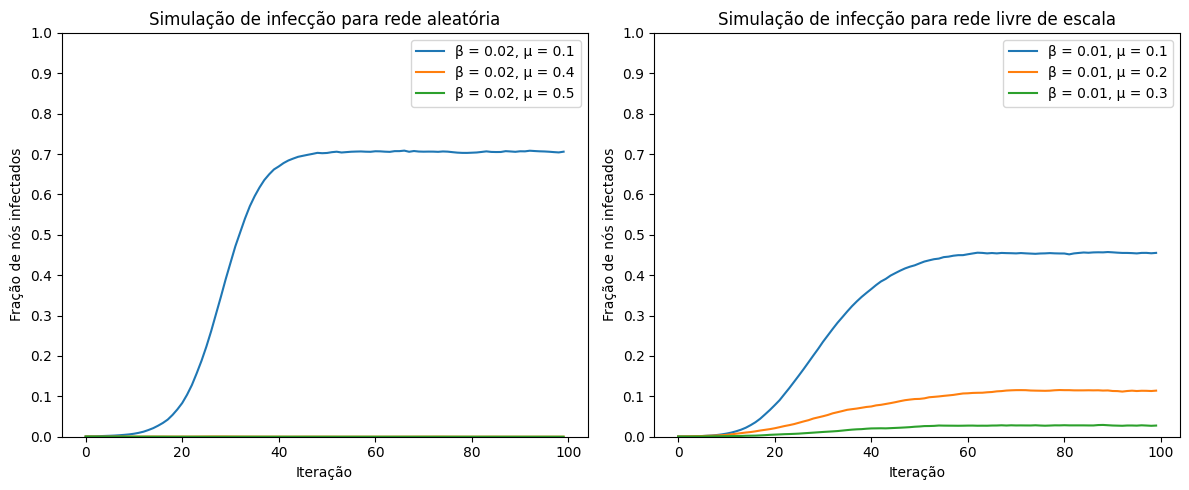

In [93]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for inf_frac, mi in infected_fraction1:
    plt.plot(inf_frac, label=f'β = {beta1}, μ = {mi}')
plt.title('Simulação de infecção para rede aleatória')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.subplot(1, 2, 2)
for inf_frac, mi in infected_fraction2:
    plt.plot(inf_frac, label=f'β = {beta2}, μ = {mi}')
plt.title('Simulação de infecção para rede livre de escala')
plt.xlabel('Iteração')
plt.ylabel('Fração de nós infectados')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend()

plt.tight_layout()
plt.show()